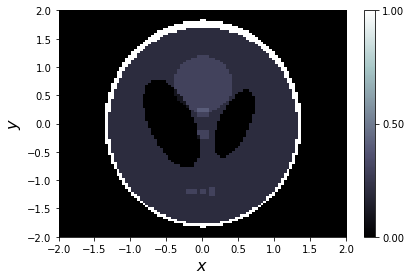

<Figure size 432x288 with 0 Axes>

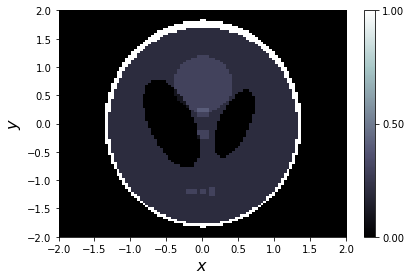

In [20]:
import odl
import numpy as np
import matplotlib.pyplot as plt

# Generate the image space with odl.uniform_discr, then call a function or a phantom in that space where to test reconstruction
# and show in screen
space=odl.uniform_discr([-2,-2],[2,2],[100,100])
#f=space.element(lambda x: (1-(x[0]**2+x[1]**2))*(x[0]**2+x[1]**2<=1))
f=odl.phantom.transmission.shepp_logan(space,modified='True')
f.show()

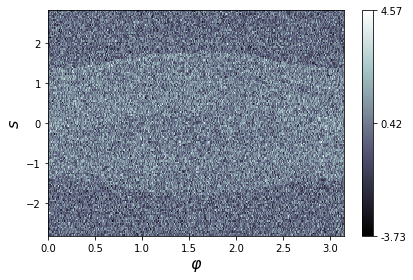

<Figure size 432x288 with 0 Axes>

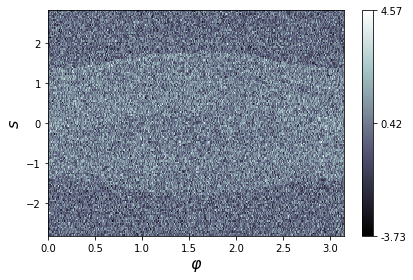

In [40]:
# Obtain the geometry for a parallel-beam with odl.tomo.geometry.parallel.parallel_beam_geometry, 
#then get a forward operator for Radon transform with odl.tomo.operators.ray_trafo.RayTransform and add some noise in the sinogram space
geometry=odl.tomo.geometry.parallel.parallel_beam_geometry(space, num_angles=360)
op=odl.tomo.operators.ray_trafo.RayTransform(space,geometry)
sinogram=op(f)
sinogram=sinogram+odl.phantom.noise.white_noise(op.range)
sinogram.show()

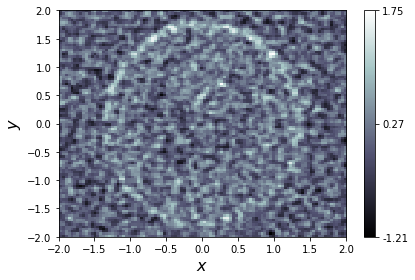

<Figure size 432x288 with 0 Axes>

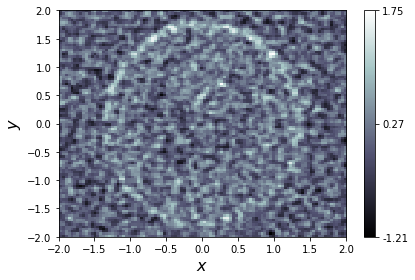

In [41]:
# Obtain the inverse operator with Filtered-Backprojection reconstruction
opinv=odl.tomo.analytic.filtered_back_projection.fbp_op(op,padding=True, filter_type='Hamming')
 
opinv(sinogram).show()